In [120]:
# Importamos librerias necesarias.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
%matplotlib inline

In [121]:
# Modelo 1: Un cuerpo fijo
def mov1 (x,t):
    x, dx = x
    return (dx, -G*M*m/x**2)    #Ecuación diferencial usada para modelar la trayectoria de un planeta alrededor de un Sol.

In [122]:
#Condiciones inciales:
G=5 #Gravedad del Sol
M=1    #Masa del Sol
m=1  #Masa del planeta

In [123]:
x0= (5, 0)   # Vector de condiciones iniciales, posición 5, velocidad inicial 0.
t1=5 #Primera condición de tiempo
t = np.linspace(0, t1, 1000)

xx = odeint(mov1, x0, t) 
salto1=t1/1000 #Es para hacerle entender al interact cada cuanto es cada paso

    

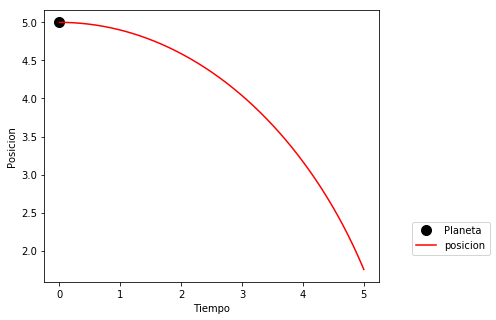

In [124]:
def plut(time=0):
    plt.figure(figsize=(6,5))
    x=xx[:,0]
    y=time
    plt.plot(y, x[int(time*(1/salto1))], 'ko', ms =10, label='Planeta')

    plt.plot(t, xx[:,0] , 'r', label='posicion')
    plt.legend(loc=(1.1, 0.1))
    plt.xlabel('Tiempo')
    plt.ylabel('Posicion')
interact_manual(plut, time = (0,t1,salto1));
plt.show()

In [125]:
# Partícula en 2d

# Definimos ecuaciones de movimiento.
def mov1 (x,t):
    x, dx, y, dy = x
    return (dx, -G*M*m*x/(y**2+x**2)**(3/2), dy, -G*M*m*y/(y**2+x**2)**(3/2))

In [126]:
x0= (5, 0, 0, 0.5) #Condiciones iniclaes de la partícula, posición en x, velocidad en x, posicion en y, velocidad en y.
t2=500 #Segunda condición de tiempo

t = np.linspace(0, t2, 1000)

xx = odeint(mov1, x0, t)

salto2=t2/1000



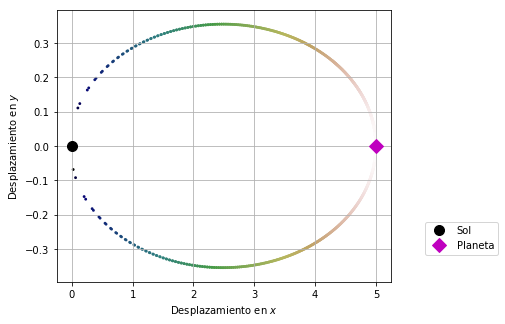

In [138]:
def plet(time=0):
    plt.figure(figsize=(6,5))
    x=xx[:,0]
    y=xx[:,2]
    z=time
    plt.scatter(xx[:,0], xx[:,2], c= xx[:,0] , s = 8, lw = 0, cmap=plt.cm.gist_earth)
    #plt.plot(z, x[int(time*(1/salto2))], 'ko', ms =10, label='Planeta 1')
    plt.plot(0, 0, 'ko', ms =10, label='Sol')
    #plt.plot(z, y[int(time*(1/salto2))], 'mD', ms =10, label='Planeta 2')
    plt.plot(x[int(time*(1/salto2))], y[int(time*(1/salto2))], 'mD', ms =10, label='Planeta')
    plt.legend(loc=(1.1, 0.1))
    plt.xlabel('Desplazamiento en $x$')
    plt.ylabel('Desplazamiento en $y$')
    plt.grid()
interact_manual(plet, time = (0,t2,salto2));
plt.show()

In [128]:
# 2 Partículas
# Se define arreglo de ecuaciones para 2 partículas
def mov1 (x,t):
    x1, dx1, y1, dy1, x2, dx2, y2, dy2 = x
    return (dx1, -G*M*m*(x1-x2)/((y1-y2)**2+(x1-x2)**2)**(3/2), dy1, -G*M*m*(y1-y2)/((y1-y2)**2+(x1-x2)**2)**(3/2),
           dx2, -G*M*m*(x2-x1)/((y1-y2)**2+(x1-x2)**2)**(3/2), dy2, -G*M*m*(y2-y1)/((y1-y2)**2+(x1-x2)**2)**(3/2))

In [129]:
x0= (5, 0, 0, 0.05, -5, 0, 0, -0.05) # Condiciones iniciales de ambas partículas.
t3=50 # Tercera condición de tiempo
t = np.linspace(0, t3, 1000)

xx = odeint(mov1, x0, t)
salto3= t3/1000


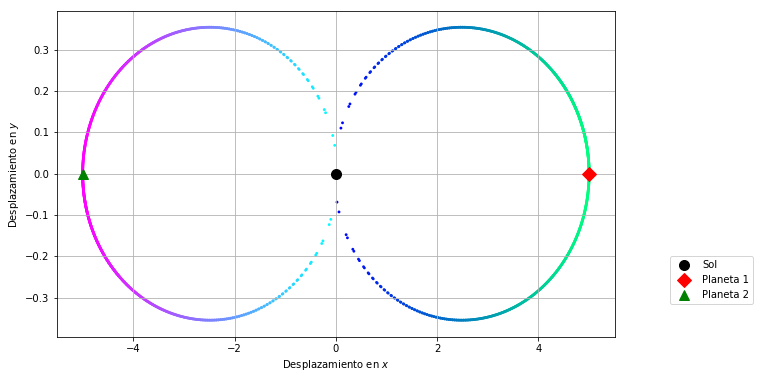

In [149]:
def plot3(time=0):
    plt.figure(figsize=(10,6))
    x1=xx[:,0]
    y1=xx[:,2]
    x2=xx[:,4]
    y2=xx[:,6]
    plt.scatter(x1, y1, c= xx[:,0] , s = 8, lw = 0, cmap=plt.cm.winter) # Gráfica 1era órbita
    plt.scatter(x2, y2, c= xx[:,0] , s = 8, lw = 0, cmap=plt.cm.cool) # Gráfica 2da órbita
    plt.plot(0, 0, 'ko', ms =10, label='Sol') # Sol
    plt.plot(x1[int(time*(1/salto3))], y1[int(time*(1/salto3))], 'rD', ms =10, label='Planeta 1') #Diamante del planeta 1
    plt.plot(x2[int(time*(1/salto3))], y2[int(time*(1/salto3))], 'g^', ms =10, label='Planeta 2') #Triangulo del planeta 2
    plt.legend(loc=(1.1, 0.1))
    plt.xlabel('Desplazamiento en $x$')
    plt.ylabel('Desplazamiento en $y$')
    plt.grid()
interact_manual(plot3, time = (0,t3,salto3));